In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import re

In [2]:
ethnic  = pd.read_excel('UIT-ViNames/Data_ethnic.xlsx')

In [3]:
ethnic

,Full_Names,Gender
0,Trần Ngọc Lan Anh,0
1,Nguyễn Thị Tú Anh,0
2,Trần Thị Kiêu Anh,0
3,Trần Thị Thanh Bình,0
4,Phạm Siêu Búp,1
...,...,...
4080,GIÀNH MÒ XÓ,0
4081,CAO THỊ THANH HUYỀN,0
4082,ĐINH HỒNG SƠN,1
4083,LỒ MAI DUYÊN,0


In [4]:
data = pd.read_csv('UIT-ViNames/UIT-ViNames - Full.csv')

In [5]:
data

,Full_Names,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
26846,Đoàn Thị Bảo Thu,0
26847,Ôn Hoa Thu,1
26848,Nguyễn Thị Huỳnh Như,0
26849,Nguyễn Thị Hồng Phúc,0


In [6]:
df = pd.concat((data, ethnic), ignore_index=True)
df

,Full_Names,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
30931,GIÀNH MÒ XÓ,0
30932,CAO THỊ THANH HUYỀN,0
30933,ĐINH HỒNG SƠN,1
30934,LỒ MAI DUYÊN,0


Giới tính nữ: 13969 (45.15%)
Giới tính nam: 16967 (54.85%)
Điểm dữ liệu: 30936


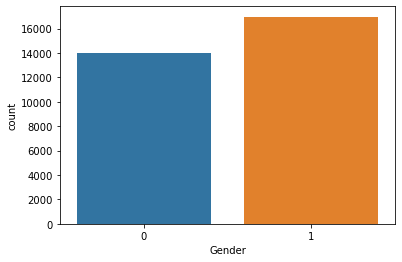

In [7]:
sns.countplot(data=df, x='Gender')
count_female = df[df.Gender==0].shape[0]
count_male = df[df.Gender==1].shape[0]
print(f'Giới tính nữ: {count_female} ({round(count_female/len(df) *100,2)}%)')
print(f'Giới tính nam: {count_male} ({round(count_male/len(df) *100,2)}%)')
print('Điểm dữ liệu:',len(df))

# Split data

In [8]:
data_female = pd.concat((data[data['Gender']==0].reset_index(drop=True), ethnic[ethnic['Gender']==0].reset_index(drop=True)), axis=0, ignore_index=True)
data_male = pd.concat((data[data['Gender']==1].reset_index(drop=True), ethnic[ethnic['Gender']==1].reset_index(drop=True)), axis=0, ignore_index=True)

In [9]:
data_female

,Full_Names,Gender
0,Bùi Dương Thảo Vy,0
1,Nguyễn Thị Vân,0
2,Trần Mai Khanh,0
3,Nguyễn Thị Hồng Diệp,0
4,Nguyễn Mai Tường Vy,0
...,...,...
13964,TRẦN MINH NGỌC,0
13965,GIÀNH MÒ XÓ,0
13966,CAO THỊ THANH HUYỀN,0
13967,LỒ MAI DUYÊN,0


In [10]:
data_male

,Full_Names,Gender
0,Ngô Xuân Tùng,1
1,Lưu Thế Huy,1
2,Dương Minh Long,1
3,Nguyễn Hoàng Khang,1
4,Thi Ngọc Thái,1
...,...,...
16962,LÝ VĂN THẮNG,1
16963,CHU QUANG MINH,1
16964,PHẠM QUỐC KHÁNH,1
16965,LÊ QUANG ĐẠI,1


In [11]:
from sklearn.model_selection import train_test_split
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(data_female['Full_Names'], data_female['Gender'], test_size=0.3, random_state=42)
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(data_male['Full_Names'], data_male['Gender'], test_size=0.3, random_state=42)

In [12]:
X_train = pd.concat((X_train_female, X_train_male), ignore_index=True)
X_test = pd.concat((X_test_female, X_test_male), ignore_index=True)
y_train = pd.concat((y_train_female, y_train_male), ignore_index=True)
y_test = pd.concat((y_test_female, y_test_male), ignore_index=True)

In [18]:
print(f'Số điểm dữ liệu tập train: {X_train.shape[0]}')
print(f'Số điểm dữ liệu tập test: {X_test.shape[0]}')

Số điểm dữ liệu tập train: 21654
Số điểm dữ liệu tập test: 9282


In [20]:
def Distribute_word(data, idx1, idx2):
    string_male, string_female = '', ''
    for row in range(len(data['Full_Names'])):
        word = data['Full_Names'][row].split()[idx1:idx2]
        for w in word:
            if data['Gender'][row] == 0:
                string_female += w + ' '
            else: string_male += w + ' ' 
            
    wordcloud_male = WordCloud(width = 500, height = 500, background_color ='white', collocations=False).generate(string_male)
    wordcloud_female = WordCloud(width = 500, height = 500, background_color ='white', collocations=False).generate(string_female)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
    ax1.set_title('Male')
    ax1.imshow(wordcloud_male)
    
    ax2.set_title('Female')
    ax2.imshow(wordcloud_female)

    ax1.axis('off')
    ax2.axis('off')
    plt.show()

# The distribution male and female first names 

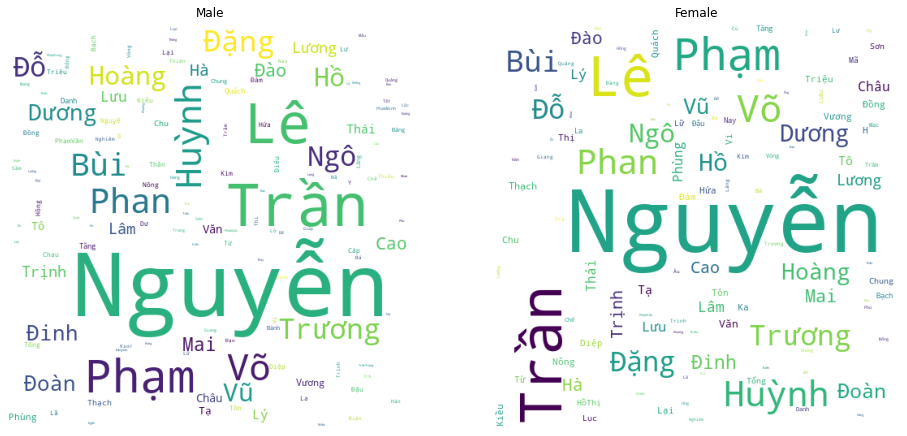

In [21]:
Distribute_word(data,0,1)

# The distribution of male and female middle names 

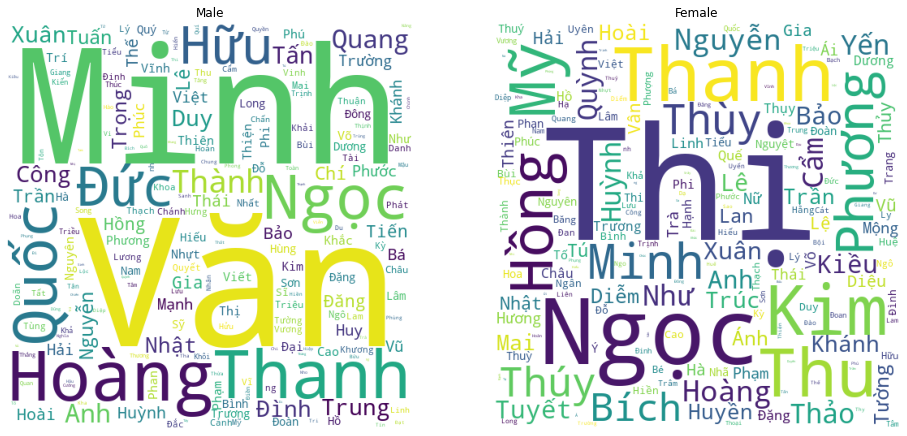

In [22]:
Distribute_word(data,1,-1)

# The distribution of male and female last names

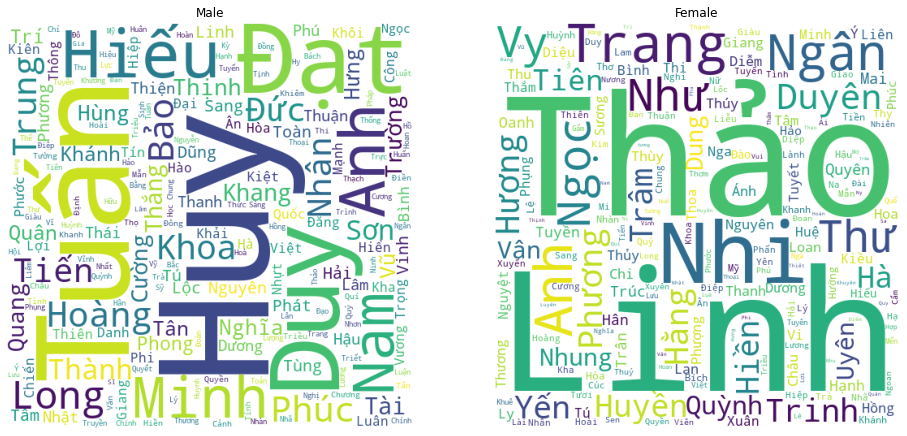

In [23]:
Distribute_word(data,-1,None)

# Preprocessing Data

In [24]:
def Preprocessing(name):
    
  # Xóa khoảng trắng thừa
  name = ' '.join(name.split())
  
  # Xóa các ký tự kéo dài: vd: Dũngggg -> Dũng
  name = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), name, flags=re.I)
  name = name.lower()

  # xóa ký tự đặc biệt vd Dũ@ng123 -> Dũng
  name = re.sub(r"[-()\\\"#/@;:<>{}`+=~|.!?,%/0123456789]", "", name)
  name = re.sub('\n', ' ', name)

  # xóa họ(Last_Name)
  name = ' '.join(name.split()[1:])

  return name

In [25]:
# preprocessing for training set
for i in tqdm(range(len(X_train))):
    X_train[i] = Preprocessing(X_train[i])

100%|██████████| 21654/21654 [00:00<00:00, 43671.40it/s]


In [26]:
# preprocessing for test set
X_test_original = pd.Series.copy(X_test) # Lưu lại bản gốc(invert_transform) về data ban đầu
for i in tqdm(range(len(X_test))):
    X_test[i] = Preprocessing(X_test[i])
    

100%|██████████| 9282/9282 [00:00<00:00, 37915.25it/s]


In [27]:
X_train

0               thy giang
1            thị thu hiền
2               thúy hằng
3                kim ngân
4          ngọc thủy tiên
               ...       
21649            duy nhất
21650            ngọc tấn
21651           quốc tuấn
21652    phạm minh chương
21653        trường giang
Name: Full_Names, Length: 21654, dtype: object

In [28]:
X_test

0            kim thanh
1        thị bích ngọc
2        thị thuỷ tiên
3       thị thanh xuân
4       thị thanh nhàn
             ...      
9277    hoàng bảo khán
9278        trọng khôi
9279          minh thư
9280         ngọc phát
9281          hữu tình
Name: Full_Names, Length: 9282, dtype: object

# Use CountVectorizer to encode data

In [29]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Use TfidfVectorizer to encode data

In [30]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [31]:
def Train_model(model, option):
    if option==1:
        model.fit(X_train_cv, y_train)
        y_pred = model.predict(X_test_cv)
    else: 
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    return y_pred
        

In [32]:
def Plot_confusion_matrix(model_cv, model_tfidf, model_name):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
    plot_confusion_matrix(model_cv, X_test_cv, y_test, ax=ax1,cmap='Blues')
    ax1.title.set_text(f'Count Vector + {model_name}')
    plot_confusion_matrix(model_tfidf, X_test_tfidf, y_test, ax=ax2,cmap='Blues')
    ax2.title.set_text(f'TF-IDF + {model_name}')

In [33]:
def Eval_model(y_test, y_pred):
    
    cls_report = classification_report(y_test, y_pred, output_dict=True)
    print(f"\tAccuracy: {cls_report['accuracy']}")
    print(f"\tPrecision: {cls_report['macro avg']['precision']}")
    print(f"\tRecall: {cls_report['macro avg']['recall']}")
    print(f"\tF1_score for female: {cls_report['0']['f1-score']}")
    print(f"\tF1_score for male: {cls_report['1']['f1-score']}")
    print(f"\tF1_score average: {cls_report['macro avg']['f1-score']}")
    
    return cls_report['0']['f1-score'], cls_report['1']['f1-score'], cls_report['macro avg']['f1-score']
    

# Naive Bayes model

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
NB_model_cv , NB_model_tfidf = MultinomialNB(), MultinomialNB()
y_pred_cv = Train_model(NB_model_cv, option=1)
y_pred_tfidf = Train_model(NB_model_tfidf, option=2)

In [37]:
# Measure of 6 algorithms: 
# F1_cv_Female	F1_cv_Male	F1_cv_Average	F1_tfidf_Female	F1_tfidf_Male	F1_tfidf_Average
measure = [[0,0,0,0,0,0]]*6

In [38]:
print('NAIVE BAYES MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('NAIVE BAYES MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[0] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

NAIVE BAYES MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.947101917690153
	Precision: 0.946676231468197
	Recall: 0.9465049625801114
	F1_score for female: 0.9413591305386361
	F1_score for male: 0.9518202335393974
	F1_score average: 0.9465896820390167
NAIVE BAYES MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9385908209437621
	Precision: 0.9384972843379557
	Recall: 0.9374385468650939
	F1_score for female: 0.9315561959654178
	F1_score for male: 0.9443141852286049
	F1_score average: 0.9379351905970114


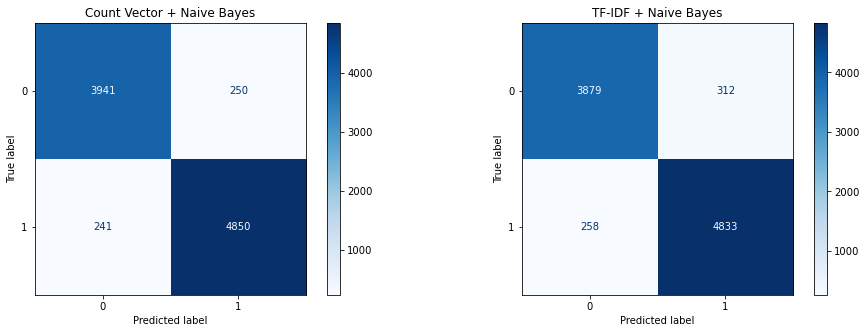

In [39]:
Plot_confusion_matrix(NB_model_cv, NB_model_tfidf, model_name='Naive Bayes')

# Mô hình SVM


In [40]:
from sklearn.svm import SVC

In [41]:
SVM_model_cv, SVM_model_tfidf = SVC(), SVC()
y_pred_cv = Train_model(SVM_model_cv, option=1)
y_pred_tfidf = Train_model(SVM_model_tfidf, option=2)

In [42]:
print('SVM MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('SVM MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[1] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

SVM MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.951734539969834
	Precision: 0.9523936668132225
	Recall: 0.9501797422908786
	F1_score for female: 0.945880647499396
	F1_score for male: 0.9564456542873809
	F1_score average: 0.9511631508933884
SVM MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9505494505494505
	Precision: 0.9514730489862062
	Recall: 0.948761952647921
	F1_score for female: 0.9444108029550685
	F1_score for male: 0.9554671582419716
	F1_score average: 0.9499389805985201


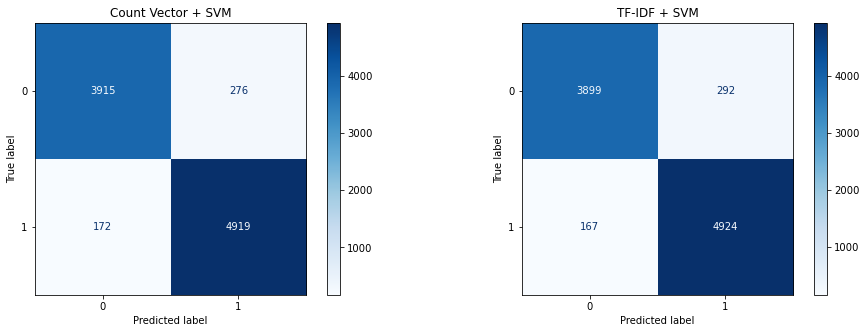

In [43]:
Plot_confusion_matrix(SVM_model_cv, SVM_model_tfidf, model_name='SVM')

# Logistic regression model

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
LR_model_cv, LR_model_tfidf = LogisticRegression(), LogisticRegression()
y_pred_cv = Train_model(LR_model_cv, option=1)
y_pred_tfidf = Train_model(LR_model_tfidf, option=2)

In [47]:
print('LOGISTIC REGRESSION MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('LOGISTIC REGRESSION MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[2] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

LOGISTIC REGRESSION MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.9515190691661279
	Precision: 0.9530033470928005
	Recall: 0.9493505951173257
	F1_score for female: 0.9452554744525548
	F1_score for male: 0.9564965197215778
	F1_score average: 0.9508759970870663
LOGISTIC REGRESSION MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9505494505494505
	Precision: 0.9519702380952382
	Recall: 0.9484034101190826
	F1_score for female: 0.9441809558555273
	F1_score for male: 0.9556135770234988
	F1_score average: 0.9498972664395131


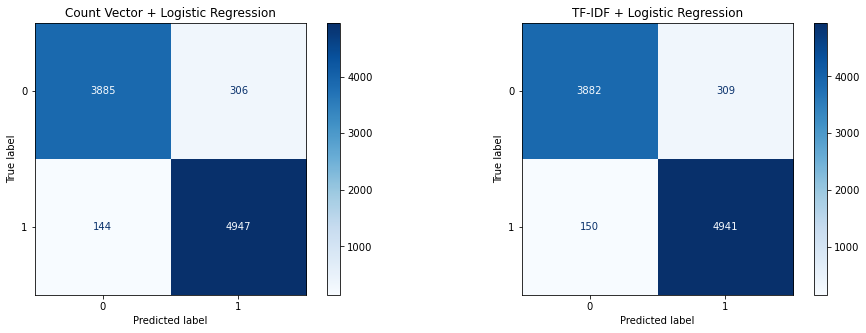

In [48]:
Plot_confusion_matrix(LR_model_cv, LR_model_tfidf, model_name='Logistic Regression')

# Mô hình KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN_model_cv, KNN_model_tfidf = KNeighborsClassifier(), KNeighborsClassifier()
y_pred_cv = Train_model(KNN_model_cv, option=1)
y_pred_tfidf = Train_model(KNN_model_tfidf, option=2)

In [51]:
print('KNN MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('KNN MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[3] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

KNN MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.933958198664081
	Precision: 0.9351754973947877
	Recall: 0.9315914212443057
	F1_score for female: 0.9253985639527808
	F1_score for male: 0.9407557746206631
	F1_score average: 0.9330771692867219
KNN MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9033613445378151
	Precision: 0.9022631781951495
	Recall: 0.9027710697517072
	F1_score for female: 0.8933792939498395
	F1_score for male: 0.9116343217417004
	F1_score average: 0.90250680784577


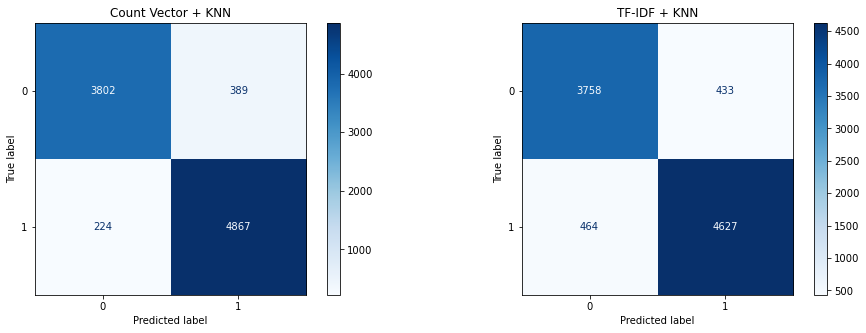

In [52]:
Plot_confusion_matrix(KNN_model_cv, KNN_model_tfidf, model_name='KNN')

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT_model_cv, DT_model_tfidf = DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(random_state=0)
y_pred_cv = Train_model(DT_model_cv, option=1)
y_pred_tfidf = Train_model(DT_model_tfidf, option=2)

In [55]:
print('DECISION TREE MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('DECISION TREE MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[4] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

DECISION TREE MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.9309416074121957
	Precision: 0.9299085850556439
	Recall: 0.9309083625756402
	F1_score for female: 0.9240611301978439
	F1_score for male: 0.9366788501432382
	F1_score average: 0.930369990170541
DECISION TREE MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9343891402714932
	Precision: 0.9339908139098825
	Recall: 0.9334817136983071
	F1_score for female: 0.9271095152603233
	F1_score for male: 0.940346752865119
	F1_score average: 0.9337281340627211


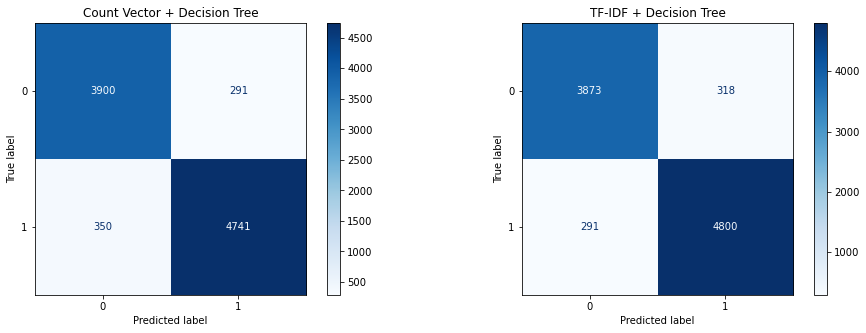

In [56]:
Plot_confusion_matrix(DT_model_cv, DT_model_tfidf, model_name='Decision Tree')

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF_model_cv, RF_model_tfidf = RandomForestClassifier(random_state=0), RandomForestClassifier(random_state=0)
y_pred_cv = Train_model(RF_model_cv, option=1)
y_pred_tfidf = Train_model(RF_model_tfidf, option=2)

In [59]:
print('RANDOM FOREST MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER')
f1_cv_0, f1_cv_1, f1_cv_avg = Eval_model(y_test, y_pred_cv)

print('RANDOM FOREST MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER')
f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg = Eval_model(y_test, y_pred_tfidf)

measure[5] = [f1_cv_0, f1_cv_1, f1_cv_avg, f1_tfidf_0, f1_tfidf_1, f1_tfidf_avg]

RANDOM FOREST MODEL: MEASURES WITH THE ENCODER COUNTVECTORIZER
	Accuracy: 0.9423615600086188
	Precision: 0.9422213618801593
	Recall: 0.9413399816960524
	F1_score for female: 0.9358282355763464
	F1_score for male: 0.947687493888726
	F1_score average: 0.9417578647325362
RANDOM FOREST MODEL: MEASURES WITH THE ENCODER TFIDFVECTORIZER
	Accuracy: 0.9462400344753286
	Precision: 0.9462483677769667
	Recall: 0.9451498124260155
	F1_score for female: 0.9400744565870061
	F1_score for male: 0.951255250561688
	F1_score average: 0.945664853574347


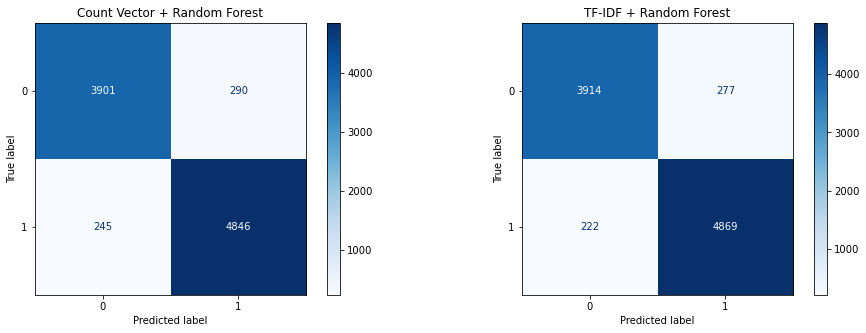

In [60]:
Plot_confusion_matrix(RF_model_cv, RF_model_tfidf, model_name='Random Forest')

In [61]:
columns = ['F1_cv_Female', 'F1_cv_Male', 'F1_cv_Average', 'F1_tfidf_Female', 'F1_tfidf_Male', 'F1_tfidf_Average']
algorithm = ['Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'RandomForest']
pd.DataFrame(measure, columns=columns, index=algorithm)

,F1_cv_Female,F1_cv_Male,F1_cv_Average,F1_tfidf_Female,F1_tfidf_Male,F1_tfidf_Average
Naive Bayes,0.941359,0.951820,0.946590,0.931556,0.944314,0.937935
Support Vector Machine,0.945881,0.956446,0.951163,0.944411,0.955467,0.949939
Logistic Regression,0.945255,0.956497,0.950876,0.944181,0.955614,0.949897
K-Nearest Neighbors,0.925399,0.940756,0.933077,0.893379,0.911634,0.902507
Decision Tree,0.924061,0.936679,0.930370,0.927110,0.940347,0.933728
RandomForest,0.935828,0.947687,0.941758,0.940074,0.951255,0.945665


Nhận xét thấy 3 model Naive Bayes, SVM, Logistic Regression cho kết quả F1-score tốt nhất khi encoding dùng CountVectorizer

sử dụng VotingClassifier trên 3 model này để tối ưu f1_score

In [62]:
from sklearn.ensemble import VotingClassifier
SVM_model_cv.probability=True
voting_clf = VotingClassifier(estimators=[('nb',NB_model_cv),('lr',LR_model_cv),('svm',SVM_model_cv)], voting='soft',weights=[1,2,3])

for clf in [NB_model_cv,LR_model_cv,SVM_model_cv,voting_clf]:
    clf.fit(X_train_cv, y_train)
    y_pred=clf.predict(X_test_cv)
    print(clf.__class__.__name__,f1_score(y_test,y_pred, average='macro'))

MultinomialNB 0.9465896820390167
LogisticRegression 0.9508759970870663
SVC 0.9511631508933884
VotingClassifier 0.9542024161948294


In [63]:
# Dùng voting_clf để dự đoán mô hình
y_pred_cv = voting_clf.predict(X_test_cv)

In [64]:
# Kết quả dự đoán trên tập test
Result = pd.concat((X_test_original, y_test, pd.DataFrame(y_pred_cv, columns=['Gender_Predict'])), axis=1)
Result

,Full_Names,Gender,Gender_Predict
0,THỊ KIM THANH,0,0
1,Ma Thị Bích Ngọc,0,0
2,Trương Thị Thuỷ Tiên,0,0
3,Võ Thị Thanh Xuân,0,0
4,Hồ Thị Thanh Nhàn,0,0
...,...,...,...
9277,Nguyễn Hoàng Bảo Khán,1,1
9278,Hoàng Trọng Khôi,1,1
9279,Huỳnh Minh Thư,1,0
9280,Dương Ngọc Phát,1,1


In [65]:
Wrong_Pred = pd.DataFrame()
name, gender, gender_pred = [], [], []
for i in range(len(Result)):
    if Result['Gender'][i] != Result['Gender_Predict'][i]:
        name.append(Result['Full_Names'][i])
        gender.append(Result['Gender'][i])
        gender_pred.append(Result['Gender_Predict'][i])
Wrong_Pred['Full_Names'] = name
Wrong_Pred['Gender'] = gender
Wrong_Pred['Gender_Predict'] = gender_pred

In [66]:
# Danh sách tên nam nhưng dự đoán là nữ
Wrong_Pred[Wrong_Pred['Gender']==1].reset_index(drop=True)

,Full_Names,Gender,Gender_Predict
0,Tào A Tuyết,1,0
1,Nguyễn Ngọc Thủy,1,0
2,Võ Tường Vi,1,0
3,Trương Thị Bích Tuyền,1,0
4,Đoàn Ngọc Duy Trinh,1,0
...,...,...,...
147,Võ Hồng Anh Thư,1,0
148,Đỗ Thị Liên,1,0
149,Nguyễn Trà Vi,1,0
150,Tô Thị Mỹ Diễm,1,0


In [64]:
# Danh sách tên nữ nhưng dự đoán là nam
Wrong_Pred[Wrong_Pred['Gender']==0].reset_index(drop=True)

,Full_Names,Gender,Gender_Predict
0,Châu Nhật Linh,0,1
1,Trần Ngọc Thanh,0,1
2,Ngô Thanh Hoài,0,1
3,Nguyễn Hữu Nhật Hạ,0,1
4,Phạm Nguyễn Pha Lê,0,1
...,...,...,...
263,Nguyễn Văn Nữ Tường Hoanh,0,1
264,Huỳnh Trần Phú,0,1
265,Mai Quang Trí,0,1
266,Nguyễn Ý Duy,0,1


# Check Input Full Name

In [67]:
def check_full_name(full_name, model):
    full_name = Preprocessing(full_name)
    vector = cv.transform([full_name]).toarray()
    if model.predict(vector) == 1:
        print('Giới Tính: Nam')
    else:
        print('Giới Tính: Nữ')

In [68]:
check_full_name('Phạm Lê Trưởngg999@', model=SVM_model_cv)
check_full_name('Trần Phươn_g !Thảo', model=SVM_model_cv)
check_full_name('Nguyễn Ngọccc Tín#', model=SVM_model_cv)

Giới Tính: Nam
Giới Tính: Nữ
Giới Tính: Nam


In [67]:
# check_full_name('full_name', model=SVM_model_cv)

Giới Tính: Nam
